# Importing

textbook from [course1](https://www.datacamp.com/courses/importing-data-in-python-part-1) & [course2](https://www.datacamp.com/courses/importing-data-in-python-part-2) 

In [ ]:
# Pickle - for data which is not convenient for flat files (in bytes)
import pickle

with open('file.pkl', 'rb') as file:
    d = pickle.load(file)

In [1]:
# Excel
import pandas as pd

file = 'file.xlsx'
xls = pd.ExcelFile(file)
print(xls.sheet_names)

df1 = xls.parse('2004')
df2 = xls.parse(0)

df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# SAS
from sas7bdat import SAS7BDAT

with SAS7BDAT('file.sas7bdat') as file:
    df_sas = file.to_data_frame()

In [ ]:
# Stata
import pandas as pd

df = pd.read_stata('file.dta')

In [ ]:
# HDF5
import numpy as np
import h5py

file = 'file.hdf5'
data = h5py.File(file, 'r')

for key in data.keys():
    print(key)

In [ ]:
# MATLAB
import scipy.io

mat = scipy.io.loadmat('file.mat')
print(mat.keys())

print(type(mat['CYratioCyt']))
print(mat['CYratioCyt'].shape)

In [ ]:
# SQLite
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Database.sqlite')
table_names = engine.table_names()
print(table_names)

#with engine.connect() as con:
#    rs = con.execute("SELECT LastName, Title FROM Employee WHERE EmployeeId >= 6")
#    df = pd.DataFrame(rs.fetchmany(size=3)) # OR fetchall
#    df.columns = rs.keys()

df = pd.read_sql_query("SELECT * FROM Album", engine)

In [ ]:
# URL
import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
df = pd.read_csv(url, sep=';')

url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xls = pd.read_excel(url, sheet_name=None)
# Print the sheetnames
print(xls.keys())
# Print the head of the first sheet
print(xls['1700'].head())

In [ ]:
# HTML (BeautifulSoup)
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

page_title = soup.title
page_text = soup.get_text()
pretty_soup = soup.prettify()

a_tags = soup.find_all('a') # find links
for link in a_tags:
    print(link.get('href'))

In [ ]:
# HTML (requests, urllib)
import requests
url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)
html = r.text

from urllib.request import urlopen, Request
url = "http://www.datacamp.com/teach/documentation"
request = Request(url)
response = urlopen(request)
html = response.read()

In [ ]:
# JSON
import json

with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

for key, value in json_data.keys():
    print(key + ': ', value)

In [ ]:
# API (open)
import requests

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'
r = requests.get(url)
json_data = r.json()

for k in json_data.keys():
    print(k + ': ', json_data[k])

In [ ]:
# API (Twitter)
import tweepy

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

l = MyStreamListener()
stream = tweepy.Stream(auth, l)
stream.filter(track=['clinton', 'trump', 'sanders',  'cruz'])

tweets_data_path = 'tweets.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()
print(tweets_data[0].keys())
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

[clinton, trump, sanders, cruz] = [0, 0, 0, 0]
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
cd = ['clinton', 'trump', 'sanders', 'cruz']
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

# Pandas

textbook from [course](https://www.datacamp.com/courses/pandas-foundations)

In [ ]:
# Build a df from lists
zipped = list(zip(list_keys, list_values))
data = dict(zipped)
df = pd.DataFrame(data)

In [ ]:
# plot all cols
df.plot(style='k.-', subplots=True) # style: color, marker, line
df.plot(kind='box', subplots=True) # box, scatter, hist

# PDF, CDF
fig, axes = plt.subplots(nrows=2, ncols=1)
df.a_col.plot(ax=axes[0], kind='hist', normed=True, bins=20, range=(0,.3))
plt.show()
df.a_col.plot(ax=axes[1], kind='hist', normed=True, bins=20, cumulative=True, range=(0,.3))
plt.show()

df.quantile([.25, .5, .75])

In [ ]:
# how different are classes and global?
global_mean = df.mean()
global_std = df.std()

a = df[df['type']=='a']
a_mean = us.mean()
a_std = us.std()

diff_mean = a_mean - global_mean
diff_std = a_std - global_std

Times

In [ ]:
df = pd.read_csv(filename, index_col='Date', parse_dates=True)

# T-mins, H, D, B-business days, W, M, Q-quarter, A-year
df1 = df.col_a.resample('6H').mean() # get mean of col_a for each 6hours 

In [ ]:
# smoothen deviation
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']
smoothed = unsmoothed.rolling(window=24).mean()
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})
august.plot()
plt.show()

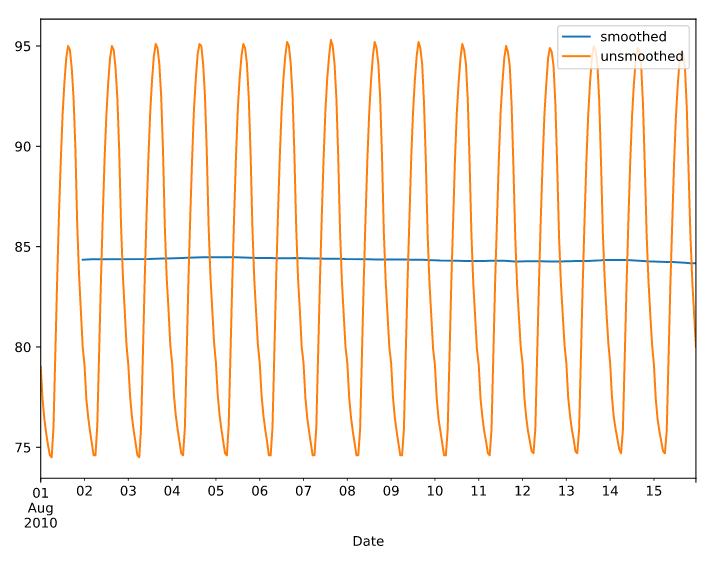

# Cleaning

textbook from [course](https://www.datacamp.com/courses/cleaning-data-in-python)

In [ ]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt

df.boxplot(column='a', by='b')
df.plot(kind='scatter', x='a', y='b')

In [ ]:
df_melt = pd.melt(df, id_vars=['c', 'd'], var_name='ab', value_name='ab_val') # melt a, b into ab. leave c, d

df_pivot = df_melt.pivot_table(index=['c', 'd'], columns='ab', values='ab_val') # split ab into a, b. leave c, d
df_pivot = df_pivot.reset_index()

In [ ]:
# concatenating multiple files that match pattern (.csv)
import glob
import pandas as pd

pattern = '*.csv'
csv_files = glob.glob(pattern)
df_list = []
for csv in csv_files:
    df = pd.read_csv(csv)
    df_list.append(df)

full_df = pd.concat(df_list)

In [ ]:
# merging on column
o2o = pd.merge(left=df1, right=df2, left_on='a', right_on='b')

In [ ]:
df.sex = df.sex.astype('category')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [ ]:
# regular expressions
import re

# xxx-xxx-xxxx
prog = re.compile('\d{3}-\d{3}-\d{4}')
result = prog.match('123-456-7890')

# find all nums
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')
print(matches)

pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
pattern2 = bool(re.match(pattern='\$\d*\d{2}', string='$123.45'))
pattern3 = bool(re.match(pattern='\A\w*', string='Australia'))

In [ ]:
# remove $ from bill
df['f_1'] = df.bill.apply(lambda x: x.replace('$', ''))
df['f_2'] = df.bill.apply(lambda x: re.findall('\d+\.\d+', x)[0])

In [ ]:
def recode_gender(gender):
    if gender == 'Female':
        return 0
    elif gender == 'Male' :
        return 1
    else:
        return np.nan 

df['sex_b'] = tips.sex.apply(recode_gender)

In [ ]:
assert df.notnull().all().all()
assert (df >= 0).all().all()

In [ ]:
def check_null_or_valid(row_data):
    """Function that takes a row of data, drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the values in the row are valid
assert df.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert df['a'].value_counts()[0] == 1

In [ ]:
countries = gapminder.country
countries = countries.drop_duplicates()
pattern = '^[A-Za-z\s\.]*$'
mask = countries.str.contains(pattern)
mask_inverse = ~mask
invalid_countries = countries.loc[mask_inverse]
print(invalid_countries)

# Functions

textbook from [course](https://www.datacamp.com/courses/python-data-science-toolbox-part-1)

In [ ]:
# Define count_entries()
def count_entries(df, col_name):
    """Return a dictionary with counts of 
    occurrences as value for each key."""
    langs_count = {}
    col = df[col_name]
    
    # Iterate over lang column in DataFrame
    for entry in col:
        # If the language is in langs_count, add 1
        if entry in langs_count.keys():
            langs_count[entry] += 1
        # Else add the language to langs_count, set the value to 1
        else:
            langs_count[entry] = 1

    # Return the langs_count dictionary
    return(langs_count)

# Call count_entries(): result
result = count_entries(tweets_df, 'lang')
print(result)

Scopes searched: LEGB <br>
- Local  scope <br>
- Enclosing functions <br>
- Global <br>
- Built-in

Nested functions
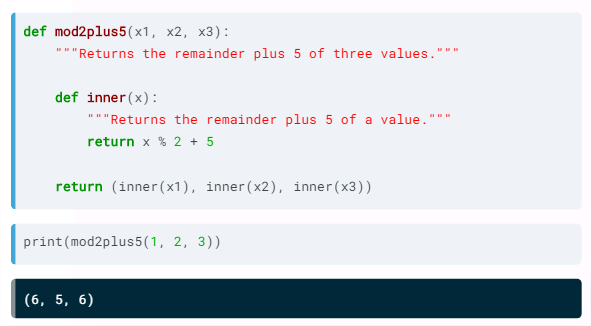

Returning functions
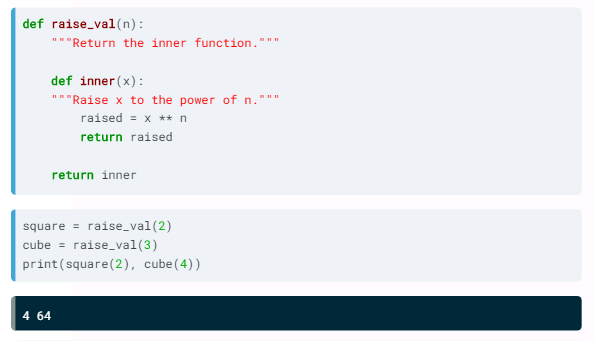

Flexible argumnets
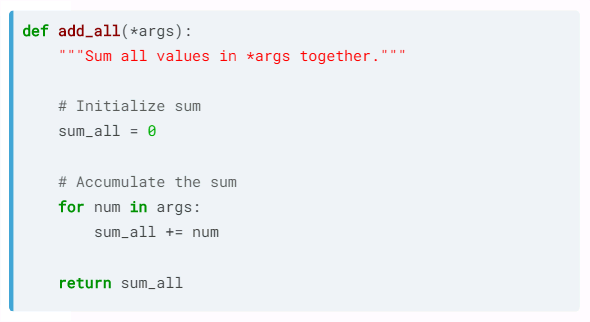

Flexible key-value arguments
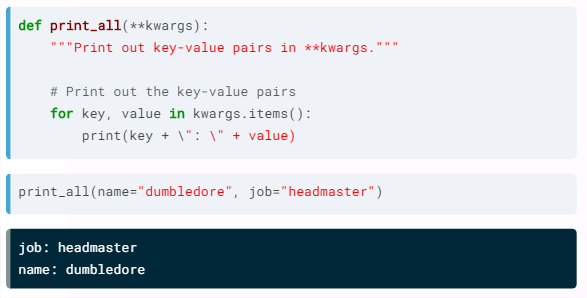

In [ ]:
# Define count_entries()
def count_entries(df, *args):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    #Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Iterate over column names in args
    for col_name in args:
    
        # Extract column from DataFrame: col
        col = df[col_name]
    
        # Iterate over the column in DataFrame
        for entry in col:
    
            # If entry is in cols_count, add 1
            if entry in cols_count.keys():
                cols_count[entry] += 1
    
            # Else add the entry to cols_count, set the value to 1
            else:
                cols_count[entry] = 1

    # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, 'lang')

# Call count_entries(): result2
result2 = count_entries(tweets_df, 'lang', 'source')

# Print result1 and result2
print(result1)
print(result2)

## Lambda functions

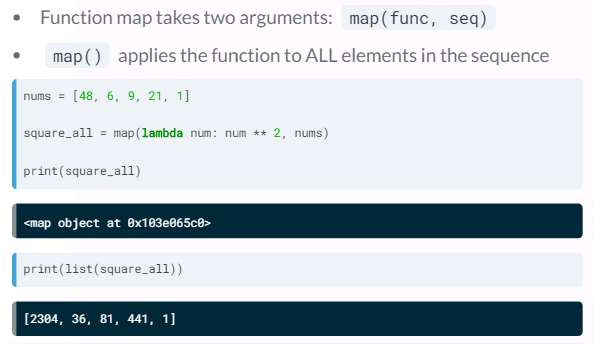

In [1]:
fellowship = ['frodo', 'samwise', 'merry', 'pippin', 'aragorn', 'boromir', 'legolas', 'gimli', 'gandalf']

# Use filter() to apply a lambda function over fellowship: result
result = filter(lambda member: len(member)>6, fellowship)

print(list(result))

['samwise', 'aragorn', 'boromir', 'legolas', 'gandalf']


In [2]:
from functools import reduce
stark = ['robb', 'sansa', 'arya', 'brandon', 'rickon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda item1, item2: item1+item2, stark)

print(result)

robbsansaaryabrandonrickon


# Errors

Handling Errors
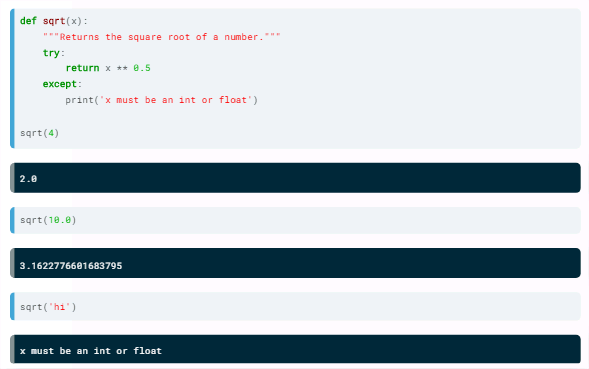

In [ ]:
def shout_echo(word1, echo=1):
    echo_word = ""
    shout_words = ""

    try:
        echo_word = word1 * echo
        shout_words = echo_word + '!!!'
    except:
        print("word1 must be a string and echo must be an integer.")

    return shout_words

shout_echo("particle", echo="accelerator")

Raising an Error
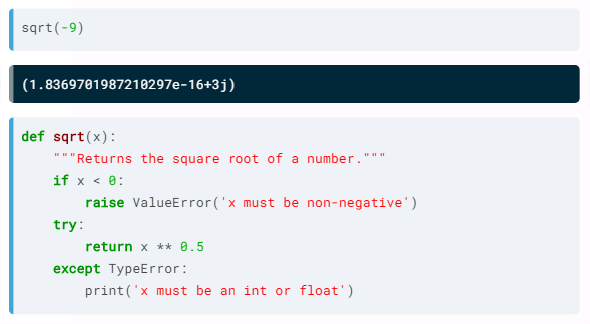

In [ ]:
def shout_echo(word1, echo=1):
    if echo < 0:
        raise ValueError('echo must be greater than 0')

    echo_word = word1 * echo
    shout_word = echo_word + '!!!'
    return shout_word

shout_echo("particle", echo=5)

In [ ]:
# Select retweets from the Twitter DataFrame: result
result = filter(lambda x: x[0:2] == 'RT', tweets_df['text'])

# Print all retweets
for tweet in list(result):
    print(tweet)

In [ ]:
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    if col_name not in df.columns:
        raise ValueError('The DataFrame does not have a ' + col_name + ' column.')

    cols_count = {}
    col = df[col_name]
    for entry in col:
        if entry in cols_count.keys():
            cols_count[entry] += 1
        else:
            cols_count[entry] = 1
    return cols_count

result1 = count_entries(tweets_df, 'lang')
print(result1)